In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mylab.ana.miniscope.context_exposure.Canamini import *
import copy

In [2]:
from core.Cdatabase import DataBase
db = DataBase()

In [3]:
session = db.index_sessions()[0]
s = build_session(session)

result is loaded


In [4]:
s.result.keys()

dict_keys(['mouse_id', 'part', 'session_num', 'aim', 'index', 'behavevideoframe', 'all_track_points', 'idx_accepted', 'S_dff', 'aligned_behave2ms', 'behavelog_info', 'behavelog_time'])

### construct  data


In [9]:
s.add_Trial_Num_Process()
s.add_alltrack_placebin_num(place_bin_nums=[4,4,30,4,4,4])
s.add_Context()
df,index = s.trim_df("S_dff",placebin = np.arange(0,50))

Trial_Num = s.result["Trial_Num"]
process = s.result["process"]
place_bin_No = copy.deepcopy(s.result["place_bin_No"])
# 将backward的place_bin_No 反向增加
max_placebin = 49
for i in place_bin_No[(process>3) | (process==0)].index:
    place_bin_No[i] = 2*max_placebin-place_bin_No[i]+1

Trial_Num=Trial_Num[index]
process=process[index]
Context= s.result["Context"][index]


data = df[index].groupby([Trial_Num,Context,place_bin_No]).mean()

data

FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Context
'Context' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
'S_dff' is taken as original self.df
trim_df : df was trimmed.


1         2       6         7         14   \
Trial_Num Context place_bin_No                                              
1         2       0             0.0  0.681395  0.0933  0.312111  0.195253   
                  1             0.0  2.329835  0.0000  0.000000  0.470865   
                  2             0.0  1.479982  0.0000  0.000000  1.425943   
                  3             0.0  0.846221  0.0000  0.000000  2.185976   
                  4             0.0  0.312652  0.0000  0.000000  1.669416   
...                             ...       ...     ...       ...       ...   
65        1       95            0.0  0.000000  0.0000  0.000000  0.000000   
                  96            0.0  0.000000  0.0000  0.093603  0.000000   
                  97            0.0  0.000000  0.0000  0.109896  0.000000   
                  98            0.0  0.000000  0.0000  0.000000  0.000000   
                  99            0.0  0.087973  0.0000  0.002823  0.164752   

                                    15        23        24        25   \
Trial_Num Context place_bin_No                                          
1         2       0             0.13234  0.845002  0.092439  0.176319   
                  1             0.00000  0.539488  0.000000  0.000000   
                  2             0.00000  0.203805  0.276152  0.000000   
                  3             0.00000  0.205870  0.064763  0.614067   
                  4             0.00000  0.000000  0.000000  0.000000   
...                                 ...       ...       ...       ...   
65        1       95            0.00000  0.038815  0.000000  0.000000   
                  96            0.00000  0.917293  0.000000  0.000000   
                  97            0.00000  1.313676  0.000000  0.000000   
                  98            0.00000  1.417429  0.000000  0.000000   
                  99            0.00000  0.383385  0.000000  0.000000   

                                     26   ...       254       256       262  \
Trial_Num Context place_bin_No            ...                                 
1         2       0             1.141398  ...  0.162050  0.015712  1.841658   
                  1             4.894729  ...  0.660716  0.000000  0.042854   
                  2             5.898661  ...  0.526640  0.000000  0.197752   
                  3             6.169414  ...  0.233059  0.000000  0.155475   
                  4             7.902004  ...  1.790908  0.000000  0.000000   
...                                  ...  ...       ...       ...       ...   
65        1       95            0.449886  ...  0.000000  0.000000  0.000000   
                  96            0.659723  ...  0.000000  0.117560  0.291497   
                  97            0.487265  ...  0.000000  0.000000  0.370496   
                  98            0.213663  ...  0.000000  0.000000  0.303955   
                  99            0.000000  ...  0.000000  0.000000  0.267627   

                                266       273       275       276       291  \
Trial_Num Context place_bin_No                                                
1         2       0             0.0  0.040914  0.126072  0.867320  0.000000   
                  1             0.0  0.000000  0.225767  0.031490  0.000000   
                  2             0.0  0.000000  0.116708  0.004964  0.097796   
                  3             0.0  0.000000  0.025275  0.118538  0.128815   
                  4             0.0  0.000000  0.000000  0.000000  0.000000   
...                             ...       ...       ...       ...       ...   
65        1       95            0.0  0.000000  0.000000  0.000000  0.117930   
                  96            0.0  0.264530  0.000000  0.000000  0.000000   
                  97            0.0  1.422199  0.000000  0.000000  0.009580   
                  98            0.0  0.554968  0.000000  0.504942  0.000000   
                  99            0.0  0.000000  0.000000  0.074065  0.000000   

                        

#### rank-sum test

In [10]:
from mylab.ana.Mstat import Wilcoxon_ranksumstest
import seaborn as sns
from itertools import combinations


##### construct matrix_pvalue dict

In [11]:
matrix_pvalue = {}
for c1,c2 in combinations(np.unique(data.index.get_level_values(level="Context")),2):
    matrix_pvalue["context%s_%s"%(c1,c2)] = np.full((len(data.columns),max(place_bin_No)),np.nan) # [cells,placebins]
    for i,cell in enumerate(data.columns,0):
#         print("i:%s"%i)
        for placebin in np.arange(0,max(place_bin_No)):
#             print("%s"%placebin,end=" ")
            try:
                context_a = data.xs(key=(c1,placebin),level=("Context","place_bin_No"))[cell]
                context_b = data.xs(key=(c2,placebin),level=("Context","place_bin_No"))[cell]
                if len(context_a) < 3 or len(context_b) < 3:
                    pass
                else:
                    statistic,p_value = Wilcoxon_ranksumstest(context_a,context_b)
            
                    matrix_pvalue["context%s_%s"%(c1,c2)][i,placebin] = p_value
            except:
                p_value = np.nan
            



##### plot

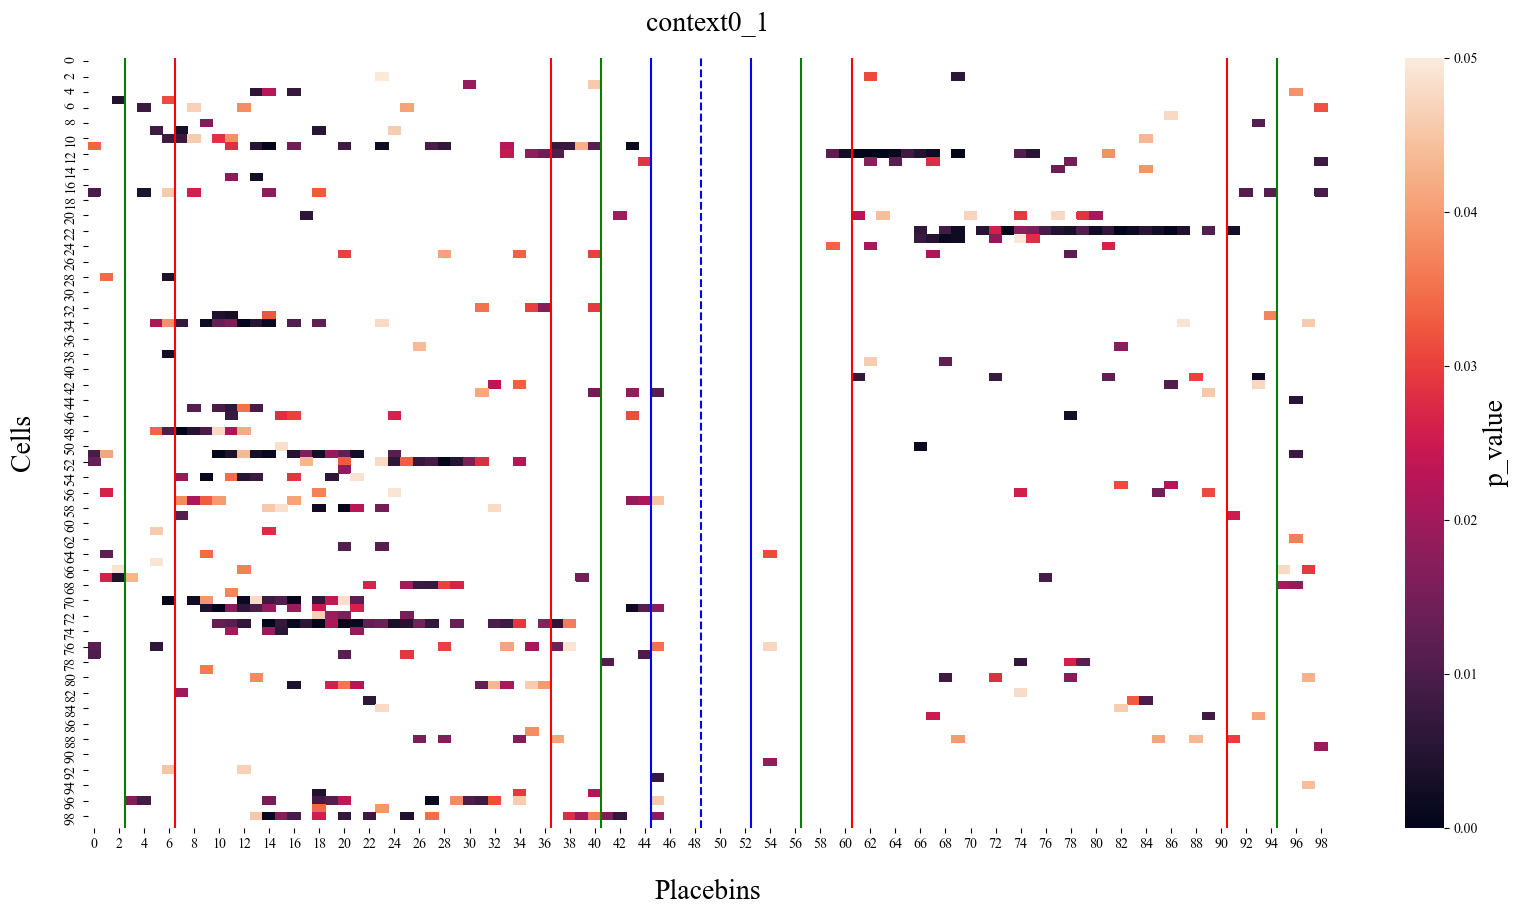

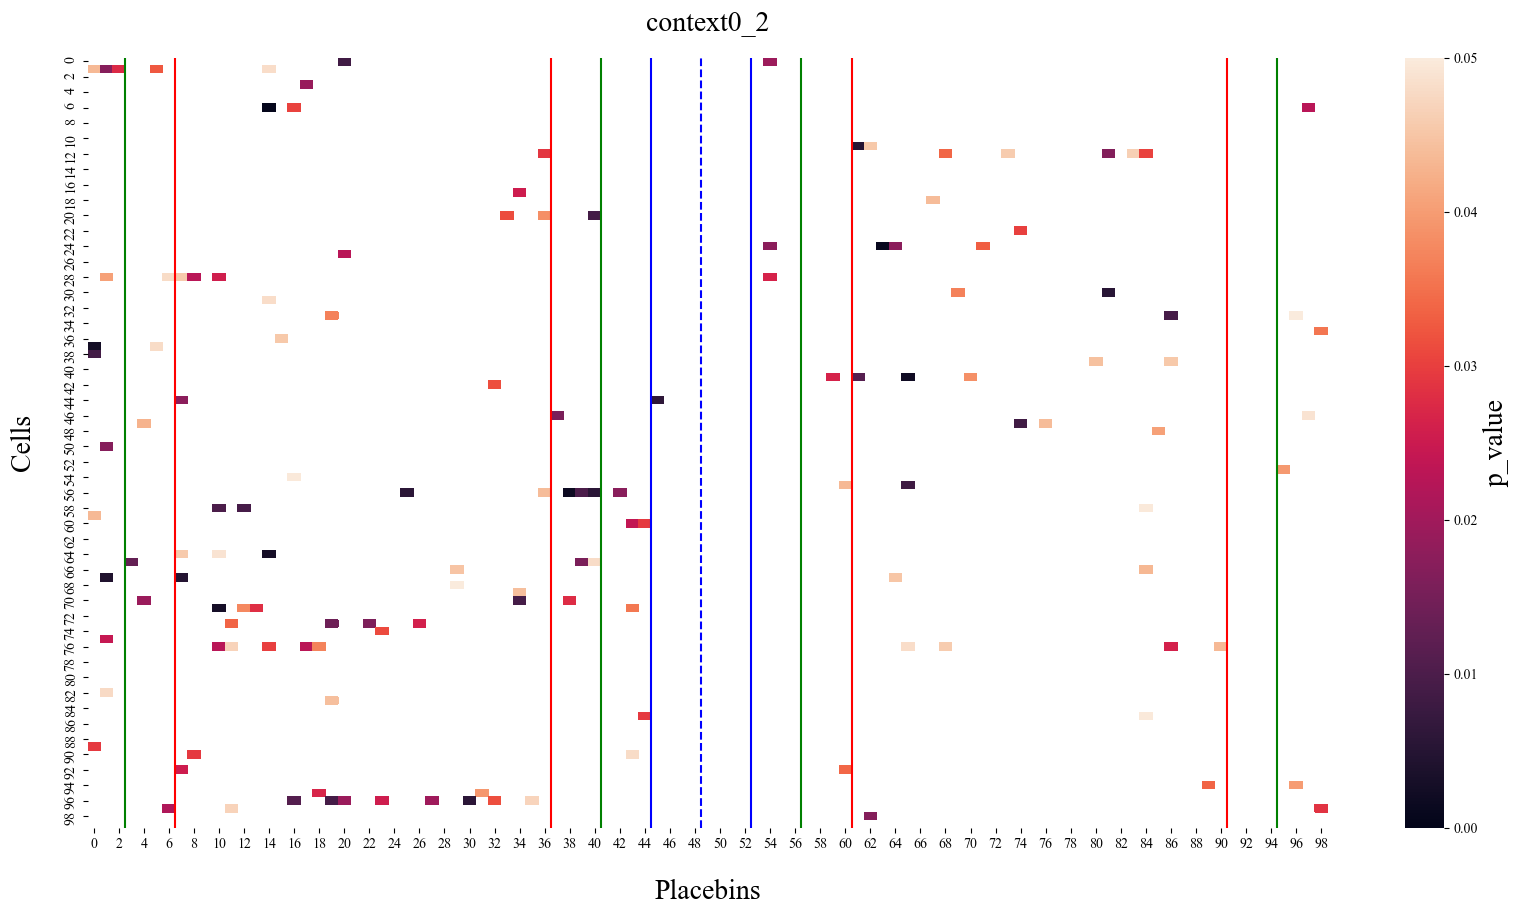

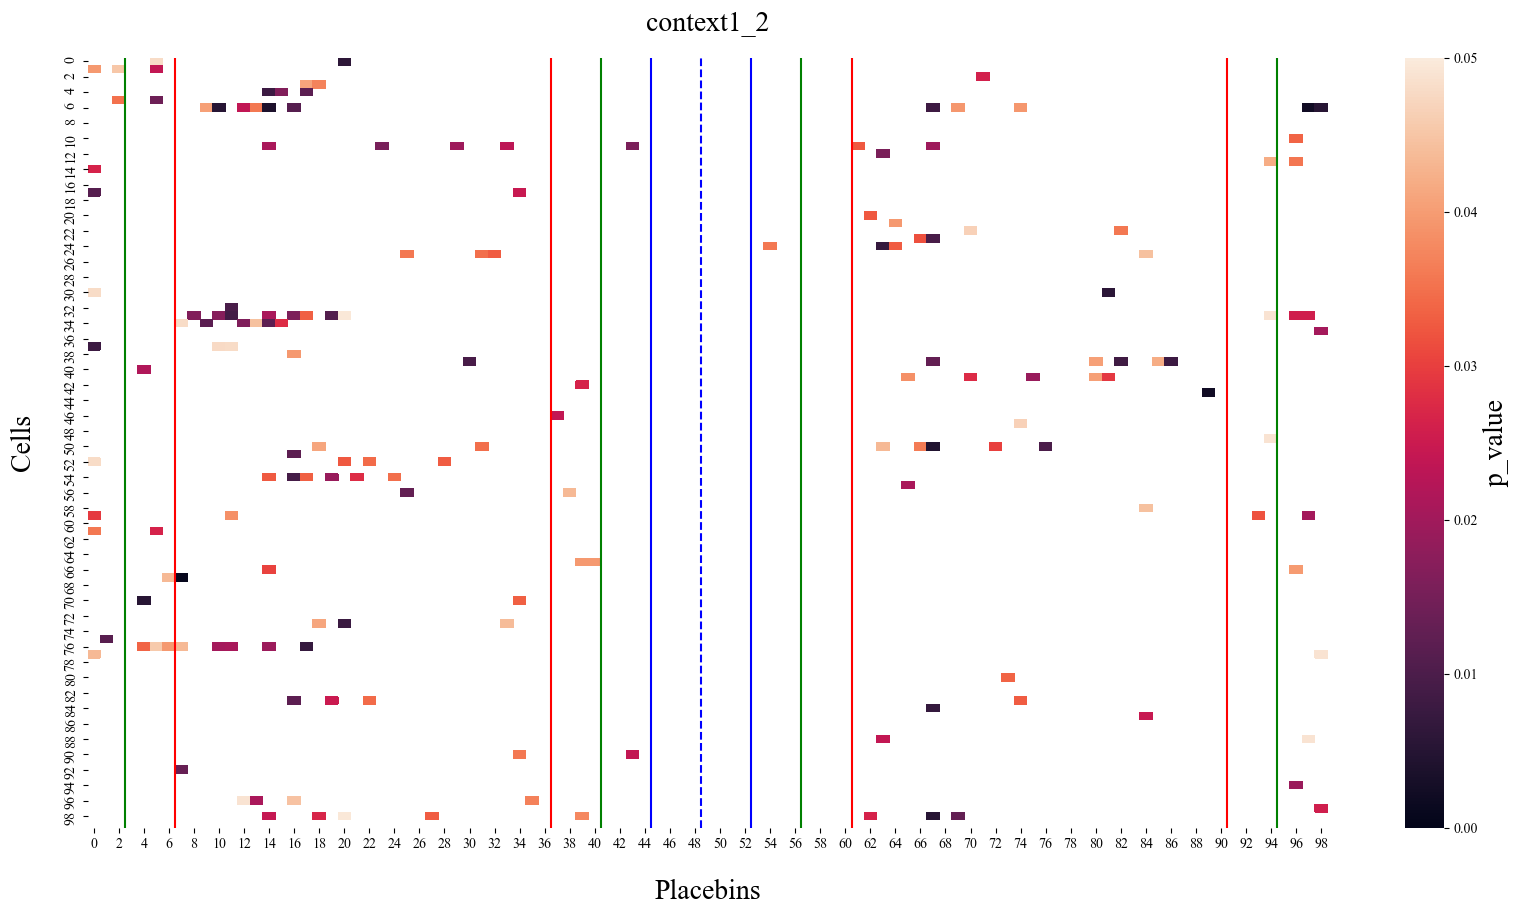

In [60]:
plt.rc('font',family='Times New Roman')
for key in matrix_pvalue.keys():
    matrix = matrix_pvalue[key]
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(matrix,vmin=0,vmax=0.05,mask=matrix>0.05,cbar_kws = {'label':'P_value',"pad":0.05})
    cbar = ax.collections[0].colorbar
    cbar.set_label(label="p_value",fontsize=20)
    for x in [3,7,37,41,45,49,53,57,61,91,95]:
        color = "red"
        linetype="-"
        if x in [3,41,57,95]:
            color = "green"
            linetype="-"
        if x in [45,53]:
            color = "blue"
            linetype="-"
        if x in [49]:
            color = "blue"
            linetype="--"
        plt.axvline(x,c=color,linestyle=linetype)
        plt.ylabel("Cells",fontdict={"fontsize":20},labelpad=20)
        plt.xlabel("Placebins",fontdict={"fontsize":20},labelpad=20)
        plt.title(key,fontdict={
            "fontsize":20
        },pad=20)
        

#### singlecell example

In [5]:
from mylab.ana.miniscope.context_exposure.ana_funtions import SingleCell_MeanFr_in_SingleTrial_along_Placebin,plot_MeanFr_along_Placebin

In [6]:
s.add_Trial_Num_Process()
s.add_Context()
s.add_alltrack_placebin_num(place_bin_nums=[4,4,30,4,4,4])
s.add_Body_speed(scale=0.33)

s.add_behave_forward_context(according="Enter_ctx")
s.add_behave_choice_side()
s.add_behave_reward()

FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Context' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUN::add_behave_forward_context
'behave_forward_context' was added according to Enter_ctx.
FUN::add_behave_choice_side
'behave_choice_side' was added.
FUN::add_behave_reward
'behave_reward' was added


In [7]:
Context_Matrix_info = SingleCell_MeanFr_in_SingleTrial_along_Placebin(s,"S_dff",Body_speed=3)

FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:333: RuntimeWarning: Mean of empty slice
  matrix_mean = np.nanmean(matrix,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:334: RuntimeWarning: Mean of empty slice
  matrix_speed_mean = np.nanmean(matrix_speed,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:345: RuntimeWarning: Mean of empty slice
  matrix_standarization_mean = np.nanmean(matrix_standarization,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:333: RuntimeWarning: Mean of empty slice
  matrix_mean = np.nanmean(matrix,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\

>>>>>>>>>>>>>>>>>


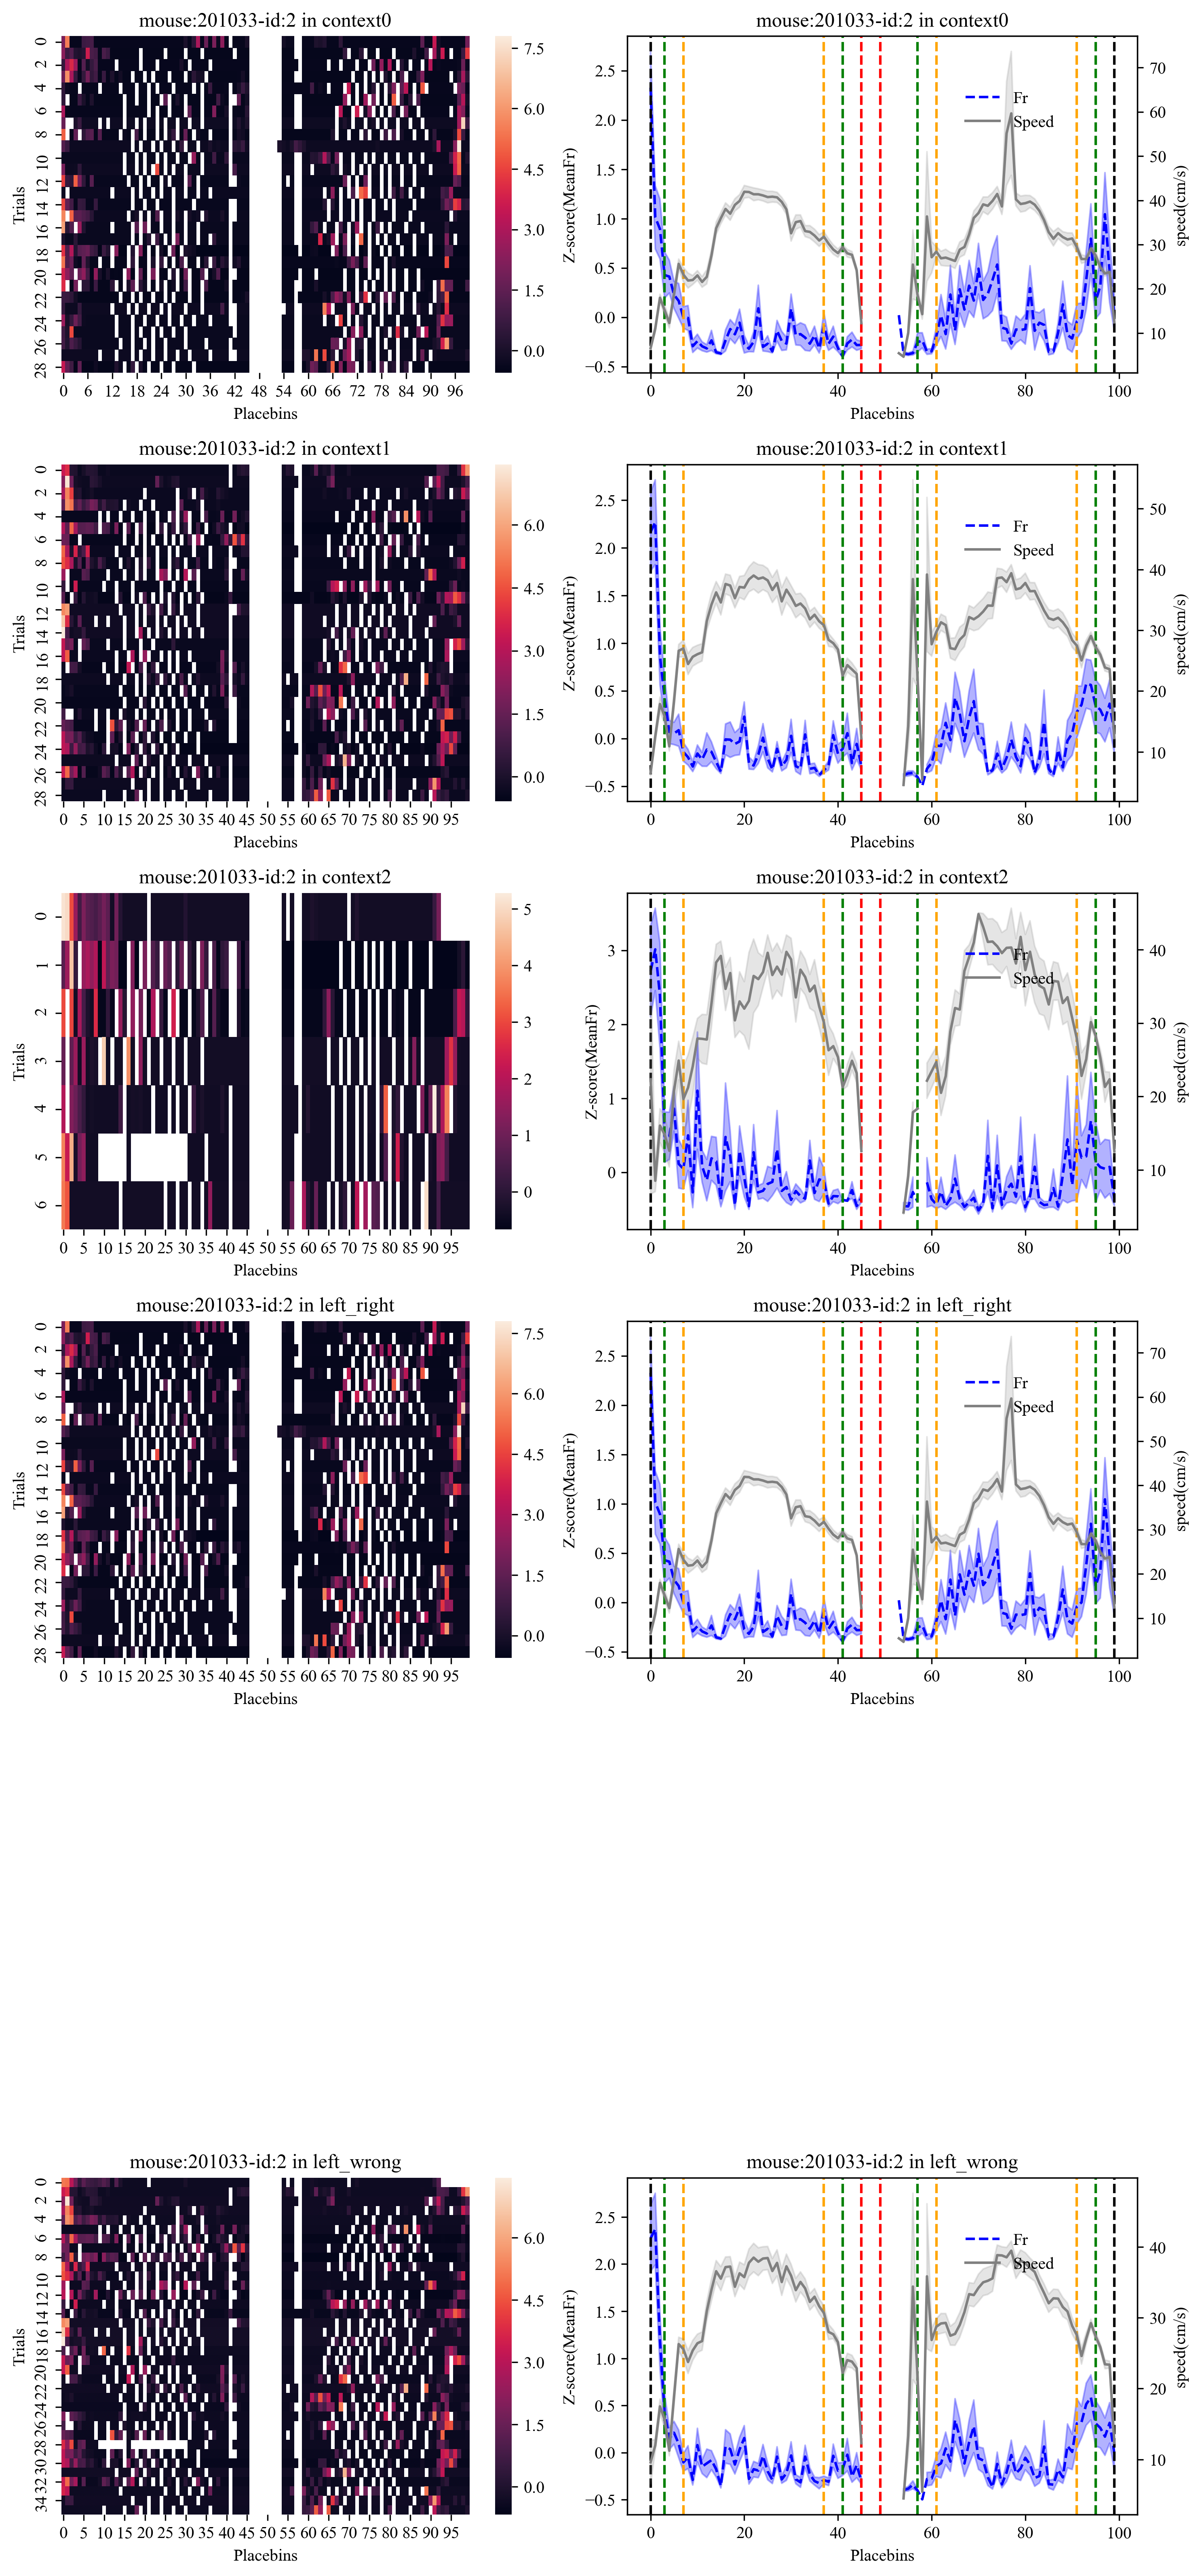

In [8]:
plot_MeanFr_along_Placebin(Context_Matrix_info,idx=2,save=False)

In [13]:
Context_Matrix_info.keys()

Context_Matrix_info["place_bins"]

dict_keys(['cellids', 'mouse_id', 'part', 'index', 'aim', 'place_bins', 'Matrix_cellids_placebins_trials', 'meanspeed', 'trials'])